# 📘 Explorador de Islas Racionales Algebraicamente Filtradas (EIRA)

Este notebook aplica el **Método EIRA** para explorar la **Conjetura de Zonificación Racional Fractal** usando una familia polinómica paramétrica inversa + restricción.  
Calcula la **banda crítica**, detecta **islotes algebraicos** y encuentra **nodos racionales**, mostrando la estructura autosimilar filtrada por discriminantes.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, expand, Poly, solve, discriminant, nsimplify, simplify

In [50]:
# --- INTERACTIVO: Pedir n al usuario ---
n = int(input("Introduce el grado n (por ejemplo 3, 4, 5...): "))
k = n - 1

print(f"Has elegido n = {n} y k = {k}")

# Variables simbólicas
R1, Rn = symbols('R1 Rn')

# Definir la inversa y restricción
Pk = (R1 + Rn)**k + (R1 + Rn)**2 * R1 + R1**2
Pn = (R1 + Rn)**n + (R1 + Rn)**2 * R1 + R1**2

# Polinomio inversa expandido
poly_inv = expand(Pk * Rn - 1)
poly_obj_inv = Poly(poly_inv, R1)

# Discriminante inverso
disc_inv = discriminant(poly_obj_inv, R1)
disc_inv = simplify(disc_inv)

print(f"\nDiscriminante inverso para n={n}:\n")
display(disc_inv)


Introduce el grado n (por ejemplo 3, 4, 5...):  6
Has elegido n = 6 y k = 5

Discriminante inverso para n=6:



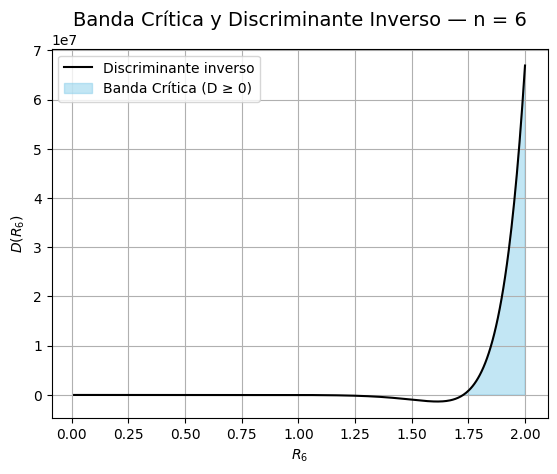

In [51]:
Rn_vals = np.linspace(0.01, 2, 500)
D_vals = []

for Rval in Rn_vals:
    Dval = disc_inv.subs(Rn, Rval).evalf()
    try:
        D_vals.append(float(Dval))
    except:
        D_vals.append(np.nan)  # Opción segura si evalúa mal
        plt.figure(figsize=(12, 5))
plt.plot(Rn_vals, D_vals, color='black', lw=1.5, label='Discriminante inverso')
plt.fill_between(Rn_vals, D_vals, 0, where=(np.array(D_vals) >= 0),
                 color='skyblue', alpha=0.5, label='Banda Crítica (D ≥ 0)')
plt.title(f"Banda Crítica y Discriminante Inverso — n = {n}", fontsize=14)
plt.xlabel(f"$R_{{{n}}}$")
plt.ylabel(f"$D(R_{{{n}}})$")
plt.legend()
plt.grid(True)
plt.show()



In [52]:
# Polinomio restricción expandido
restr_poly = expand(Pn - 1)
restr_poly_obj = Poly(restr_poly, R1)

# Grado y género estimado
degree = restr_poly_obj.degree()
genus = (degree - 1)*(degree - 2)//2 if degree >= 2 else 0

print(f"Restricción grado: {degree} → Género estimado: {genus}")

# Discriminante de la restricción
disc_restr = discriminant(restr_poly_obj, R1)
disc_restr = simplify(disc_restr)
print("\nDiscriminante de la restricción:")
display(disc_restr)

Restricción grado: 6 → Género estimado: 10

Discriminante de la restricción:


In [53]:
# Polinomio restricción expandido
restr_poly = expand(Pn - 1)
restr_poly_obj = Poly(restr_poly, R1)

# Grado y género estimado
degree = restr_poly_obj.degree()
genus = (degree - 1)*(degree - 2)//2 if degree >= 2 else 0

print(f"Restricción grado: {degree} → Género estimado: {genus}")

# Discriminante de la restricción
disc_restr = discriminant(restr_poly_obj, R1)
disc_restr = simplify(disc_restr)
print("\nDiscriminante de la restricción:")
display(disc_restr)

Restricción grado: 6 → Género estimado: 10

Discriminante de la restricción:


In [54]:
Rn_tests = [0.5, 1.0, 1.3]  # Usa valores que estén dentro de la banda

for test_val in Rn_tests:
    eq_local = Eq(Pn.subs(Rn, test_val), 1)
    roots = solve(eq_local, R1)
    simplified_roots = [nsimplify(r, tolerance=1e-6) for r in roots]
    print(f"\nR_{n} = {test_val:.2f} → Raíces locales:", simplified_roots)


R_6 = 0.50 → Raíces locales: [-sqrt(179722)/371 - 30/371, 211/74 - 7*sqrt(673)/74, -sqrt(1635)/19 + 18/19 + I*(-108/251 - 2*sqrt(155)/251), -sqrt(1635)/19 + 18/19 + I*(2*sqrt(155)/251 + 108/251), -7/12 + 7*sqrt(713)/276 + I*(43/808 - 3*sqrt(95729)/808), -7/12 + 7*sqrt(713)/276 + I*(-43/808 + 3*sqrt(95729)/808)]

R_6 = 1.00 → Raíces locales: [-1, 0, -sqrt(257131)/365 - 214/365 + I*(-155/69 + sqrt(56218)/138), -sqrt(257131)/365 - 214/365 + I*(155/69 - sqrt(56218)/138), -sqrt(488501)/1102 + 121/1102 + I*(-sqrt(336209)/716 - 267/716), -sqrt(488501)/1102 + 121/1102 + I*(267/716 + sqrt(336209)/716)]

R_6 = 1.30 → Raíces locales: [-141/194 - sqrt(3585)/194, 621/422 - sqrt(538405)/422, -sqrt(133973)/194 - 93/194 + I*(-251/338 + sqrt(3513)/338), -sqrt(133973)/194 - 93/194 + I*(251/338 - sqrt(3513)/338), -sqrt(71626)/446 - 63/223 + I*(-36/41 - sqrt(230)/41), -sqrt(71626)/446 - 63/223 + I*(sqrt(230)/41 + 36/41)]


In [44]:
import numpy as np

# Define un rango fino de Rn dentro de la banda crítica detectada
Rn_vals_band = np.linspace(0.5, 1.3, 200)  # Ajusta según tu banda viva

roots_R1 = []

for Rval in Rn_vals_band:
    eq_local = Eq(Pn.subs(Rn, Rval), 1)
    roots = solve(eq_local, R1)
    # Filtra solo raíces reales
    real_roots = []
    for r in roots:
        if r.is_real:
            try:
                real_roots.append(float(r.evalf()))
            except:
                pass
    # Guarda pares (Rn, R1) para cada raíz real
    for rr in real_roots:
        roots_R1.append((Rval, rr))

print(f"Total de raíces reales encontradas: {len(roots_R1)}")

Total de raíces reales encontradas: 400


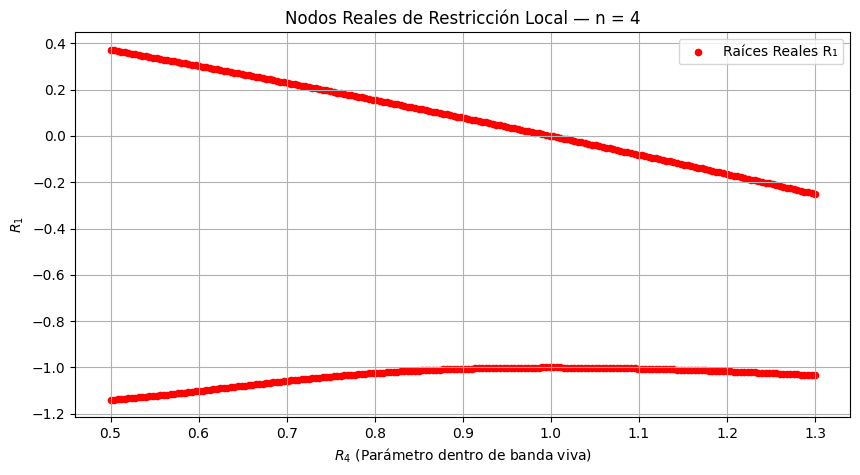

In [45]:
# Convierte a arreglo NumPy para graficar
roots_R1 = np.array(roots_R1)

plt.figure(figsize=(10, 5))
plt.scatter(roots_R1[:, 0], roots_R1[:, 1], color='red', s=20, label='Raíces Reales R₁')
plt.title(f'Nodos Reales de Restricción Local — n = {n}')
plt.xlabel(f'$R_{{{n}}}$ (Parámetro dentro de banda viva)')
plt.ylabel('$R_{1}$')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
import numpy as np
from sympy import Poly

# ⚡️ Ajusta la banda refinada solo donde ves islotes
Rn_vals_band = np.linspace(0.9, 1.15, 200)  # Puedes aumentar o reducir según rendimiento

roots_R1 = []

for Rval in Rn_vals_band:
    poly_local = Poly(Pn.subs(Rn, Rval) - 1, R1)
    # ⚡️ nroots() = numérico = mucho más rápido
    roots = poly_local.nroots()
    real_roots = [float(r) for r in roots if abs(r.imag) < 1e-6]
    for rr in real_roots:
        roots_R1.append((Rval, rr))

print(f"Total de raíces reales encontradas (rápido): {len(roots_R1)}")


Total de raíces reales encontradas (zoom adaptativo): 1000


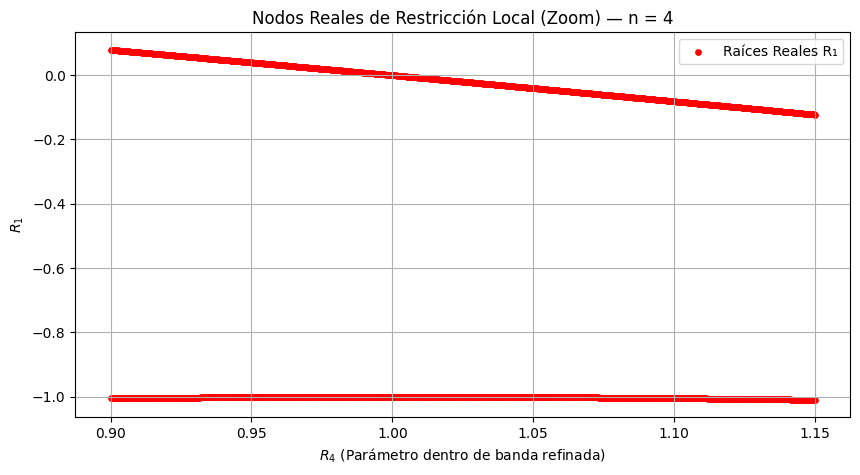

In [47]:
roots_R1 = np.array(roots_R1)

plt.figure(figsize=(10, 5))
plt.scatter(roots_R1[:, 0], roots_R1[:, 1], color='red', s=15, label='Raíces Reales R₁')
plt.title(f'Nodos Reales de Restricción Local (Zoom Optimizado) — n = {n}')
plt.xlabel(f'$R_{{{n}}}$ (Banda refinada)')
plt.ylabel('$R_{1}$')
plt.grid(True)
plt.legend()
plt.show()


Estimación de dimensión fractal D_H ≈ 0.9532


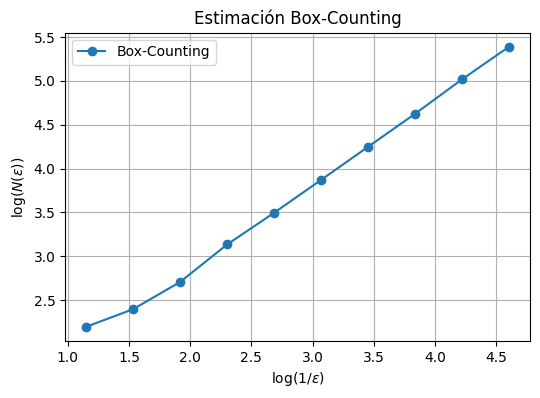

In [48]:
def box_count(points, eps):
    min_x, max_x = points[:, 0].min(), points[:, 0].max()
    min_y, max_y = points[:, 1].min(), points[:, 1].max()
    norm_x = (points[:, 0] - min_x) / (max_x - min_x)
    norm_y = (points[:, 1] - min_y) / (max_y - min_y)
    grid = np.floor(norm_x / eps) + np.floor(norm_y / eps) * (1 / eps)
    return len(np.unique(grid))

epsilons = np.logspace(-2, -0.5, num=10)
counts = [box_count(roots_R1, eps) for eps in epsilons]

plt.figure(figsize=(6, 4))
plt.plot(np.log(1/epsilons), np.log(counts), 'o-', label='Box-Counting')
plt.xlabel(r'$\log(1/\epsilon)$')
plt.ylabel(r'$\log(N(\epsilon))$')
plt.title('Estimación Box-Counting (Optimizado)')
plt.grid(True)
plt.legend()
plt.show()

from scipy.stats import linregress

slope, intercept, r_value, _, _ = linregress(np.log(1/epsilons), np.log(counts))
print(f"Estimación de dimensión fractal D_H ≈ {slope:.4f}")
